In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import acquire as aq
import prepare as p


# plotting defaults
plt.rc('figure', figsize=(13, 6))
plt.style.use('seaborn-whitegrid')
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=14)

## Exercise Instructions

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## Acquire and Prep Data

In [2]:
#acquire
energy = aq.get_power_data()

Using cached csv...


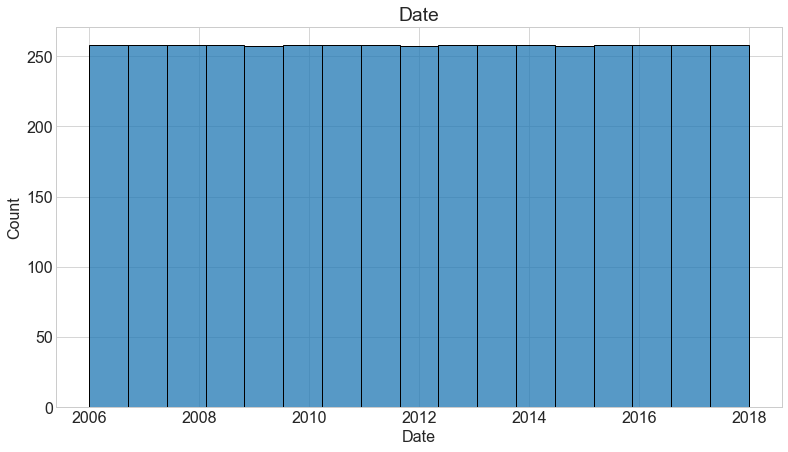

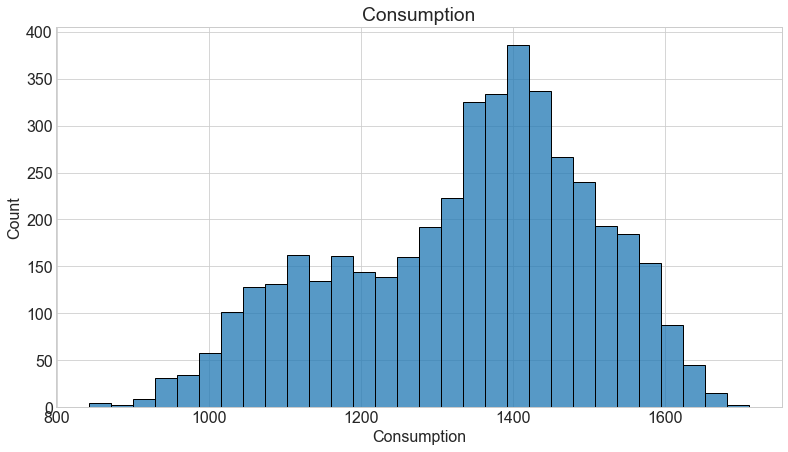

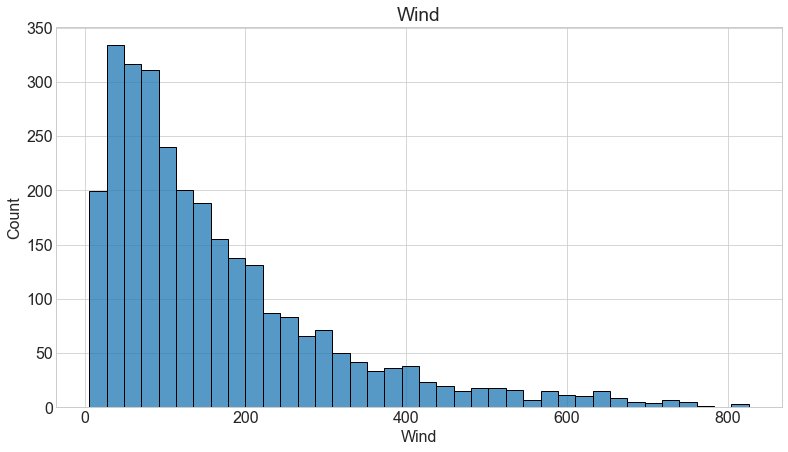

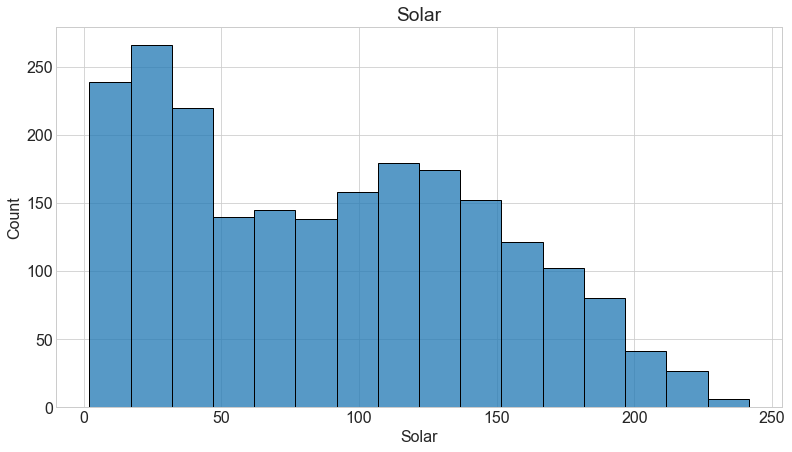

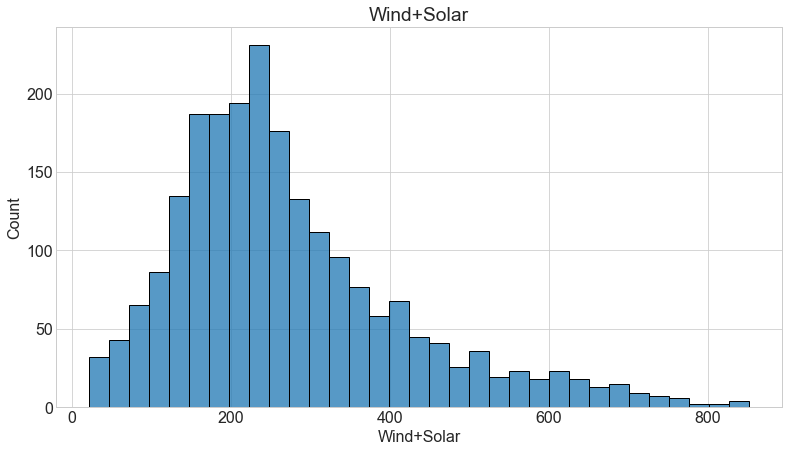

In [3]:
#prepare
energy = p.prepare_energy(energy)

In [4]:
energy.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


<AxesSubplot:xlabel='Date'>

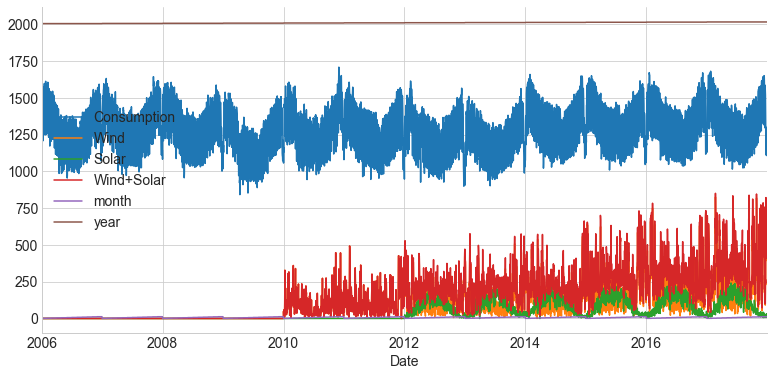

In [11]:
energy.plot()

In [7]:
energy.index.min()

Timestamp('2006-01-01 00:00:00')

In [8]:
energy.index.max()

Timestamp('2017-12-31 00:00:00')

## Split Data

*I'll implement the human-based approach for splitting this data. The train set will conisist of everthing up to 2016. Test will conist of data from 2016 - 2017.*

In [9]:
train = energy[:'2015']
test = energy['2016':]
train.shape, test.shape

((3652, 6), (731, 6))

## Explore Data

<AxesSubplot:xlabel='Date'>

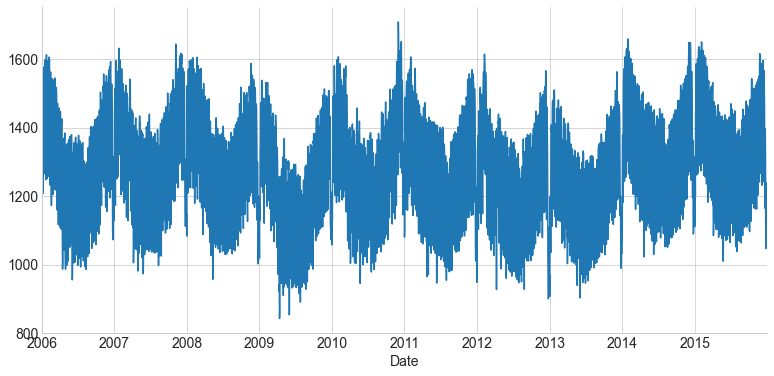

In [12]:
# Let's plot consumption
train.Consumption.plot()

<AxesSubplot:xlabel='Date'>

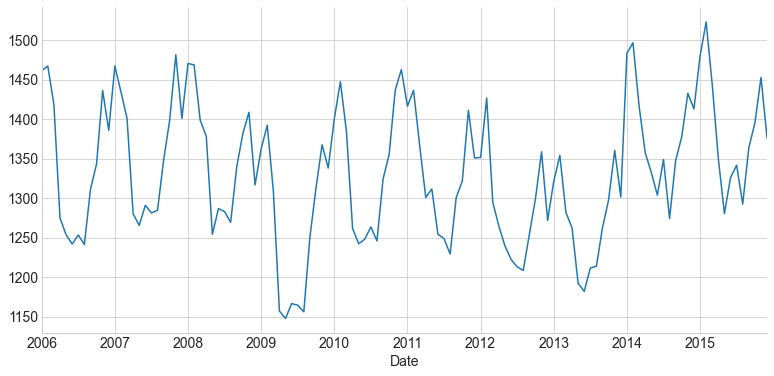

In [14]:
# Let's resample and look at monthly averages
train.resample('M').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

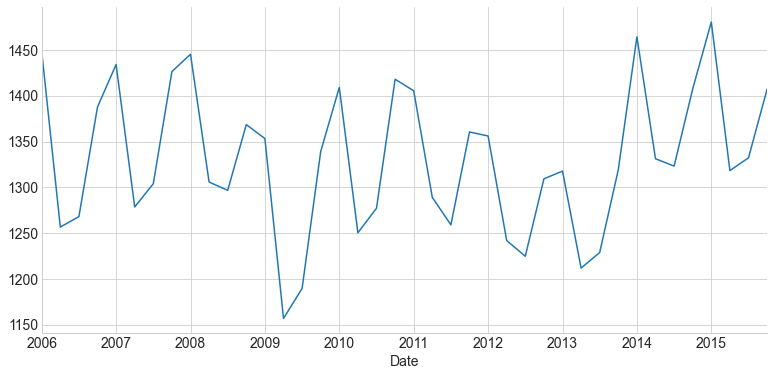

In [15]:
# How about quarterly
train.resample("Q").Consumption.mean().plot()


*There's a clear cycle. It seems like it represents greater consumption in colder months vs less int he summer months.*

In [17]:
y = train.Consumption.resample('M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
Date,,,,
2006-01-31,1461.442065,NaN,89.281365,NaN
2006-02-28,1467.106893,NaN,113.896299,NaN
2006-03-31,1418.649161,NaN,37.569597,NaN
2006-04-30,1275.058900,NaN,-38.915070,NaN
2006-05-31,1253.488484,NaN,-77.751511,NaN


<AxesSubplot:xlabel='Date'>

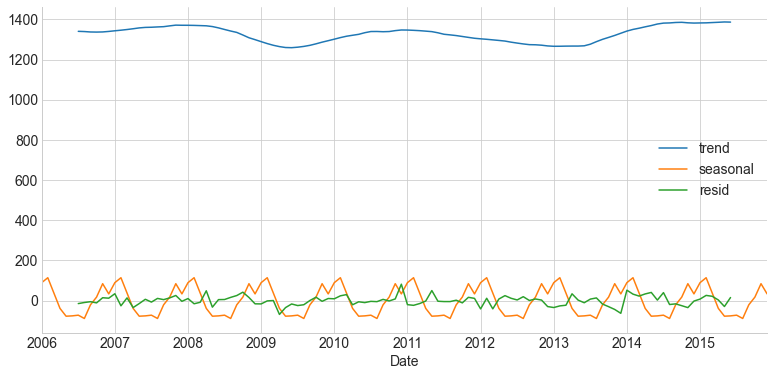

In [20]:
decomposition.iloc[:, 1:].plot()

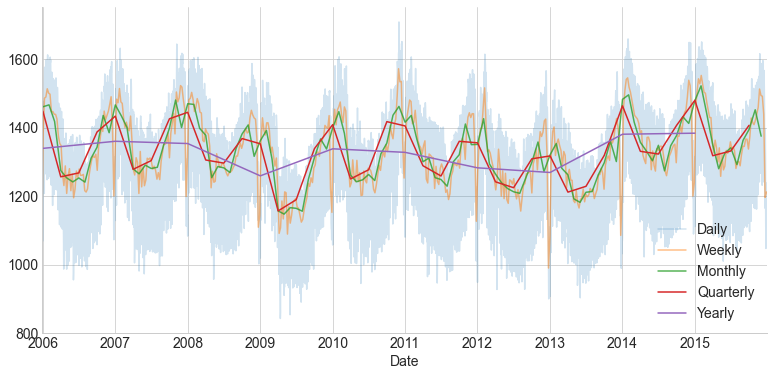

In [23]:
# Let's re-sample on different time scales to look for a trend
train.Consumption.plot(label = 'Daily', alpha = 0.2)
train.Consumption.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Consumption.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Consumption.resample('Q').mean().plot(label = 'Quarterly')
train.Consumption.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*There seems to be a conistent trend overtime.*

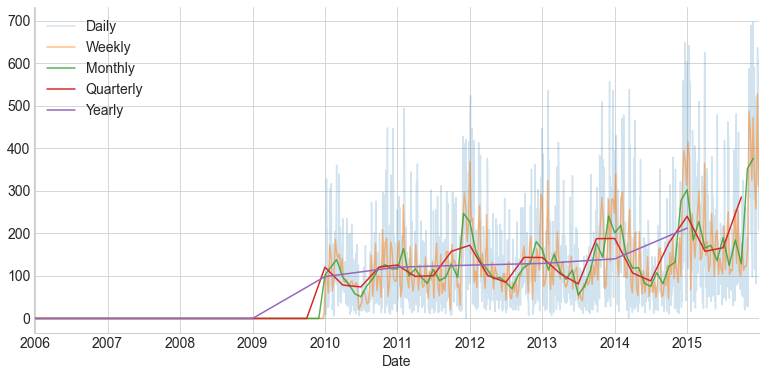

In [24]:
# Let's look at wind power generation
train.Wind.plot(label = 'Daily', alpha = 0.2)
train.Wind.resample('W').mean().plot(label = 'Weekly', alpha = 0.5)
train.Wind.resample('M').mean().plot(label = 'Monthly', alpha = 0.8)
train.Wind.resample('Q').mean().plot(label = 'Quarterly')
train.Wind.resample('Y').mean().plot(label = 'Yearly')
plt.legend()
plt.show()

*There's a clear positive trend here steadily increasing over the years. It also seems like theres a clear cycle that varies depending on the windier to less windy months of the year.*